# Precipitation CSV Cleanup
* This script prepares the CSV's from Time_Series script for use in Phase 2
* Cleaning up the forecast data from the facebook prophet outputs
* Outputs from Time_Series are uploaded in Github in `Precipitation Prediction Outputs zip`


**About the Precipitation Prediction CSVs**
Outputs of precipitation prediction CSVs
* `fbprophet_avg_annual_precip`: prediction of precipitation for the next 50 years
* units are in mm

In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from datetime import datetime



In [2]:
# import data
# source: https://data.gov.in/catalog/rainfall-india?filters%5Bfield_catalog_reference%5D=1090541&format=json&offset=0&limit=6&sort%5Bcreated%5D=desc
import os
os.chdir(r'C:\\Users\\livsh\\Downloads') 
fb_prophet_df = pd.read_csv('fbprophet_annual_precip.csv')

In [3]:
fb_prophet_df.head()

,Unnamed: 0,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,1901-12-31,434.944641,457.004425,882.685554,434.944641,434.944641,230.692705,230.692705,230.692705,230.692705,230.692705,230.692705,0.0,0.0,0.0,665.637346
1,1,1902-12-31,434.833012,454.473269,865.791632,434.833012,434.833012,225.668978,225.668978,225.668978,225.668978,225.668978,225.668978,0.0,0.0,0.0,660.501990
2,2,1903-12-31,434.721384,466.165983,848.092626,434.721384,434.721384,220.486633,220.486633,220.486633,220.486633,220.486633,220.486633,0.0,0.0,0.0,655.208017
3,3,1904-12-31,434.609450,457.482879,874.152684,434.609450,434.609450,235.551702,235.551702,235.551702,235.551702,235.551702,235.551702,0.0,0.0,0.0,670.161152
4,4,1905-12-31,434.497821,453.577834,874.962894,434.497821,434.497821,230.692705,230.692705,230.692705,230.692705,230.692705,230.692705,0.0,0.0,0.0,665.190526


In [4]:
precip = pd.DataFrame()

In [5]:
# add the year and annual precipitation to the dataframe that will be used in Phase 2
precip['Date'] = fb_prophet_df['ds']      # datetime object
precip['Annual'] = fb_prophet_df['yhat']  # float

# using the assumption that JJAS precipitation is about 92% of the annual rainfall
# create a new column for JJAS
percent_JJAS = 0.92

#round to 3 decimal places
precip['Annual'] = round((fb_prophet_df['yhat']), 3)
precip['JJAS'] = round((precip['Annual'] * percent_JJAS), 3)

In [6]:
# Creating a datetime object so we can test.
a = datetime.now()

# Converting a to string in the desired format (YYYYMMDD) using strftime
# and then to int.
year = a.strftime("%Y")
print(year)

2020


In [7]:
# view first few rows of precip dataframe
precip.head(167)

,Date,Annual,JJAS
0,1901-12-31,665.637,612.386
1,1902-12-31,660.502,607.662
2,1903-12-31,655.208,602.791
3,1904-12-31,670.161,616.548
4,1905-12-31,665.191,611.976
...,...,...,...
162,2063-12-31,637.045,586.081
163,2064-12-31,651.996,599.836
164,2065-12-31,647.024,595.262
165,2066-12-31,641.886,590.535


In [8]:
# check data types for the columns
# year is datetime object
# precipitation values are floats 
precip.dtypes 

Date       object
Annual    float64
JJAS      float64
dtype: object

In [9]:
# create another column for year as an int
# keep just the date
# source: https://www.dataquest.io/blog/python-datetime-tutorial/

# this doesnt work
#precip['Year'] = precip['Date'].strftime("%Y")
#precip.head(167)

In [10]:
# # create another column for year as an int USING A LOOP
# keep just the date
# source: https://www.dataquest.io/blog/python-datetime-tutorial/

precip['Year'] = precip['Date']

for i in range(0, len(precip)):
    precip['Year'][i] = precip['Date'][i][0:4]
    precip['Year'][i] = int(precip['Year'][i])
    
precip.head(167)

C:\Users\livsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\livsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Date,Annual,JJAS,Year
0,1901-12-31,665.637,612.386,1901
1,1902-12-31,660.502,607.662,1902
2,1903-12-31,655.208,602.791,1903
3,1904-12-31,670.161,616.548,1904
4,1905-12-31,665.191,611.976,1905
...,...,...,...,...
162,2063-12-31,637.045,586.081,2063
163,2064-12-31,651.996,599.836,2064
164,2065-12-31,647.024,595.262,2065
165,2066-12-31,641.886,590.535,2066


In [11]:
# check data types
precip.dtypes

Date       object
Annual    float64
JJAS      float64
Year       object
dtype: object

In [12]:
# export cleaned data to CSV for use in Phase 2
# uploaded to github team repository
precip.to_csv('predicted_precipitation.csv')

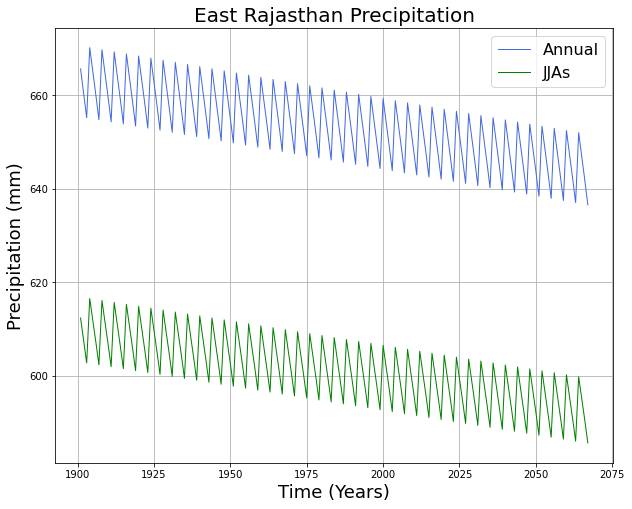

In [13]:
# visualize data
plt.figure(figsize=(10,8))

plt.plot(precip['Year'], precip['Annual'], color='royalblue', linewidth=1.0, label = 'Annual')
plt.plot(precip['Year'], precip['JJAS'], color='green', linewidth=1.0, label = 'JJAs')


plt.legend(fontsize = 16)
plt.grid()
plt.xlabel('Time (Years)', fontsize = 18)
plt.ylabel('Precipitation (mm)', fontsize = 18)
plt.title('East Rajasthan Precipitation', fontsize = 20);